## 서울시 공공 체육시설별 정보 데이터 분석하기

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('../Dataset/서울시 공공 체육시설별 정보.xlsx')
df.dtypes

시설명                  object
일련번호                  int64
시설키                  object
종목시설명                object
종목시설키                object
종목명                  object
종목키                  object
위치                   object
면적(㎡)                object
규격                   object
연면적(㎡)               object
문의전화                 object
수용인원(정원)             object
이용대상                 object
이용기간                 object
이용시간                 object
이용료(원)               object
용도                   object
비고                   object
대관링크주소               object
이미지파일                object
선별방법(선착순-1,추첨순-2)    object
유의사항                 object
이용단위                 object
dtype: object

In [3]:
df = df.drop(['일련번호', '종목시설키', '위치', '면적(㎡)', '규격', '연면적(㎡)', '수용인원(정원)', '이용대상', '이용기간', '용도', '비고', '대관링크주소', '이미지파일', '선별방법(선착순-1,추첨순-2)', '유의사항', '이용단위'], axis=1)
df.head()

,시설명,시설키,종목시설명,종목명,종목키,문의전화,이용시간,이용료(원)
0,오류남초등학교,GR10106PUSM,운동장,축구,SO,02-2681-8466~8,NaN,NaN
1,가곡초등학교,GS10107PUSM,체육관,학교체육,SG,02-2661-7117,"월~금 07:30~10:30 토,일 16:00~19:30",월 85만원
2,가곡초등학교,GS10107PUSM,운동장,축구,SO,NaN,NaN,NaN
3,가양초/경서중학교,GS10108PUSM,체육관,학교체육,SG,02-2668-0303,NaN,NaN
4,가양초/경서중학교,GS10108PUSM,수영장,수영,SW,NaN,NaN,NaN


## 서울시 공공 체육시설에서 제공하는 종목 통계

In [4]:
from collections import Counter

In [5]:
games = df['종목명'].tolist()
games = Counter(games).most_common(20)
print(games)

[('헬스', 197), ('수영', 120), ('축구', 100), ('댄스', 76), ('학교체육', 74), ('농구', 72), ('체조', 70), ('에어로빅', 58), ('배드민턴', 50), ('테니스', 49), ('요가', 45), ('탁구', 40), ('골프', 40), ('유아체능단(분기별)', 39), ('인라인', 24), ('게이트볼', 24), ('당구포켓볼', 19), ('족구', 19), ('배구', 17), ('풋살', 16)]


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [7]:
x = [each[0] for each in games]
y = [each[1] for each in games]
indexes = np.arange(len(games))

In [8]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

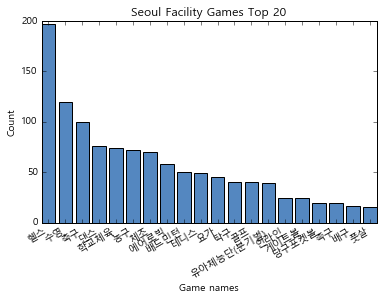

In [9]:
plt.xlabel('Game names')
plt.ylabel('Count')
plt.title('Seoul Facility Games Top 20')
plt.xticks(indexes, x)
plt.bar(indexes, y, align='center', color='#5487C0')
plt.gcf().autofmt_xdate()
plt.show()

## 서울시 공공 헬스장 이용료 통계

In [10]:
health = df[df['종목명']=='헬스']

In [11]:
health = health.drop(['문의전화', '종목키', '시설키'], axis=1)
health.dropna(subset=['이용료(원)'])

,시설명,종목시설명,종목명,이용시간,이용료(원)
130,도봉구청부설체력단련실,실내체육관,헬스,09:00~18:00,"1회(4시간) 사용기준 : 88,000원 (하절기, 동절기 냉난방비 별도 : 사용료..."
138,보라매공원,다목적운동장,헬스,NaN,"25,000원"
343,화곡청소년수련관,체육활동장,헬스,09:00~21:00,20000
364,마포청소년수련관,종합체육관,헬스,"평일대관불가, 주말 09:00~17:00","주말:400,000원"
550,창동종합사회복지관,헬스장(데이케어센터),헬스,매주 월~금 09:00-22:00,"3시간 이상 ~ 6시간 미만 1등급 24,960 개인부담 15%"
628,동대문종합사회복지관,헬스장,헬스,월~금 06:00~22:00,무료~45000
641,유락종합사회복지관,대강당,헬스,NaN,1회 1시간-4만원 (한시간 추가당 4만원 추가)
642,유락종합사회복지관,소체육실,헬스,NaN,1회 1시간-5만원 (한시간 추가당 3만원 추가)
684,홍은종합사회복지관,강당,헬스,NaN,"대강당- 1시간 : 50,000원 (냉난방 가동 시 시간 당 30,000원), ..."
722,보라매청소년수련관,공연장(다이나믹홀),헬스,09:00 - 21:00,"2000,000원(*별도대여장비-냉,난방30,000원,무대조명20,000원,빔프로젝..."


## DataFrame을 Table 형태로 가공하기
Facility Table과 Game Table은 1:N의 관계를 가짐

In [30]:
facility = df.drop(['문의전화', '종목시설명', '종목명', '종목키', '이용시간', '이용료(원)'], axis=1)
facility = facility.rename(index=str, columns={"시설명": "fname", "시설키": "fid"})
facility = facility.drop_duplicates(subset=['fid'])
facility.head()

,fname,fid
0,오류남초등학교,GR10106PUSM
1,가곡초등학교,GS10107PUSM
3,가양초/경서중학교,GS10108PUSM
6,치현초등학교,GS10109PUSM
8,봉래초등학교,JG10110PUSM


In [50]:
game = df.drop(['시설명', '종목키', '이용시간', '이용료(원)'], axis=1)
game = game.rename(index=str, columns={"시설키": "fid", "종목시설명": "gfname", "종목명": "gname",
                                       "문의전화": "call"})
game.head()

,fid,gfname,gname,call
0,GR10106PUSM,운동장,축구,02-2681-8466~8
1,GS10107PUSM,체육관,학교체육,02-2661-7117
2,GS10107PUSM,운동장,축구,NaN
3,GS10108PUSM,체육관,학교체육,02-2668-0303
4,GS10108PUSM,수영장,수영,NaN


## DataFrame을 MySQL DB에 저장하기
추후에 sqlalchemy engine 을 사용하는 것으로 수정 필요, mysql-python(MySQLdb) 추가 설치

In [39]:
import pymysql

In [37]:
conn = pymysql.connect(host='localhost', user='root', password='kdpark81', db='opendata', charset='utf8')

In [38]:
facility.to_sql('facility', conn, flavor='mysql', if_exists='replace', chunksize=1000)

C:\Users\Junyoung\Anaconda3\lib\site-packages\pandas\core\generic.py:1165: FutureWarning: The 'mysql' flavor with DBAPI connection is deprecated and will be removed in future versions. MySQL will be further supported with SQLAlchemy connectables.
  chunksize=chunksize, dtype=dtype)


In [52]:
game.to_sql('game', conn, flavor='mysql', if_exists='replace', chunksize=1000)

C:\Users\Junyoung\Anaconda3\lib\site-packages\pandas\core\generic.py:1165: FutureWarning: The 'mysql' flavor with DBAPI connection is deprecated and will be removed in future versions. MySQL will be further supported with SQLAlchemy connectables.
  chunksize=chunksize, dtype=dtype)
